In [1]:
#includes

import os
import data_utils

import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# Paths to the data folders

yolo_images = './All_Datasets/filtered_ls_data/images'
yolo_labels = './All_Datasets/filtered_ls_data/labels'

datasets = 'All_Datasets'


Image shape: (6, 224, 224)
(3, 224, 224)
(224, 224, 3)
uint16
printing image
[[[55 54 44]
  [56 56 45]
  [52 56 49]
  ...
  [47 41 38]
  [45 40 35]
  [46 40 38]]

 [[53 54 44]
  [53 55 47]
  [51 56 49]
  ...
  [46 40 36]
  [46 40 36]
  [45 39 36]]

 [[52 53 46]
  [51 56 47]
  [51 57 49]
  ...
  [46 40 36]
  [45 39 36]
  [43 37 34]]

 ...

 [[44 41 37]
  [42 38 36]
  [41 36 34]
  ...
  [48 44 40]
  [48 44 38]
  [48 44 38]]

 [[41 36 33]
  [41 36 34]
  [41 36 33]
  ...
  [50 46 40]
  [49 45 39]
  [49 45 39]]

 [[42 37 35]
  [42 38 34]
  [43 39 35]
  ...
  [50 49 42]
  [50 47 41]
  [50 47 40]]]


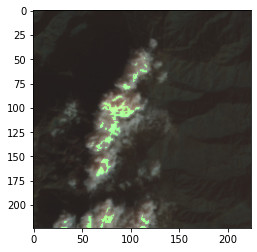

In [3]:
# Checking the full numpy dataset and visualising the images

# Path to the dataset:
desired_output_folder = '/Users/vihaan/Workspace/!Datasets/Processed_Data_new'

image_patch_outputs_folder = desired_output_folder + '/image_patches'
labels_yolo_path = desired_output_folder + '/labels'

# Getting the list of images and labels
image_files = os.listdir(image_patch_outputs_folder)

# Displaying the first 10 images
i = random.randint(0, len(image_files))

image_path = os.path.join(image_patch_outputs_folder, image_files[i])
label_path = os.path.join(labels_yolo_path, image_files[i].replace('.npy', '.txt'))
    
# Read all bands of the image
image_all_bands = np.load(image_path)

print('Image shape:', image_all_bands.shape)

image_3bands = image_all_bands[:3]
print(image_3bands.shape)

# Make [3,224,224] image into [224,224,3]
image = np.moveaxis(image_3bands, 0, -1)
print(image.shape)

print(image.dtype)


# Convert data range to [0, 255] for JPG images.
if image.dtype == np.uint16:
    scale_factor = 65535 // 255
    image = (image / scale_factor).astype(np.uint8)
elif image.max() <= 1:  # float images in [0, 1] range
    image = (image * 255).astype(np.uint8)

print('printing image')
print(image)

# Display the image
plt.imshow(image)

how empty is the image: 0.0


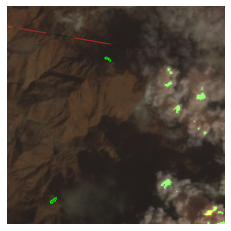

In [44]:
i = random.randint(0, len(image_files))

image_path = os.path.join(image_patch_outputs_folder, image_files[i])
label_path = os.path.join(labels_yolo_path, image_files[i].replace('.npy', '.txt'))

print('how empty is the image:',data_utils.how_empty_is_the_patch(image_path,is_path=True))
data_utils.print_yolo_labels_on_numpy_image_jupyter_notebook(image_path, label_path)


In [16]:
# Number of images we have:
print('Number of images:', len(image_files))

Number of images: 407
